In [3]:
# code to explore the tabular data in diamonds.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diamonds = pd.read_csv('diamonds.csv', index_col=0)

diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [5]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [6]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
from sklearn.model_selection import train_test_split

# split data into training, validation, and test sets
train, test = train_test_split(diamonds, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.25, random_state=42)

/tmp/ipykernel_20688/1248140447.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['cut'] = encoder.fit_transform(X_train[['cut']])
/tmp/ipykernel_20688/1248140447.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['color'] = encoder.fit_transform(X_train[['color']])
/tmp/ipykernel_20688/1248140447.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

MAE:  283.2573580107452
MAPE:  0.06779051999603515
MSE:  331364.54741157196
RMSE:  575.6427254917514
R2:  0.9787493482440285


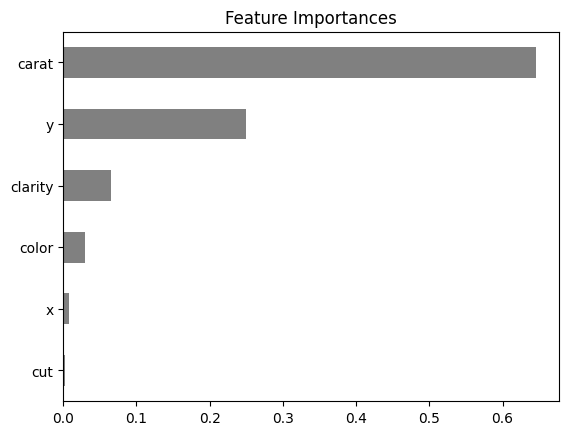

In [5]:
# import the random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score, mean_absolute_error
'''
In averaging methods, the driving principle is to build several estimators independently and 
then to average their predictions. On average, the combined estimator is usually better than 
any of the single base estimator because its variance is reduced.
'''

# create a random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# create a list of features
features = ['carat', 'cut', 'color', 'clarity', 'x', 'y']

# features = ['carat', 'x', 'y']



# create X matrix and y vector
X_train = train[features]
y_train = train['price']
X_val = val[features]
y_val = val['price']
X_test = test[features]
y_test = test['price']

# encode the categorical features
from sklearn.preprocessing import OrdinalEncoder

# create an ordinal encoder
encoder = OrdinalEncoder()

# encode the training data
X_train['cut'] = encoder.fit_transform(X_train[['cut']])
X_train['color'] = encoder.fit_transform(X_train[['color']])
X_train['clarity'] = encoder.fit_transform(X_train[['clarity']])

# encode the validation data
X_val['cut'] = encoder.fit_transform(X_val[['cut']])
X_val['color'] = encoder.fit_transform(X_val[['color']])
X_val['clarity'] = encoder.fit_transform(X_val[['clarity']])
X_test['cut'] = encoder.fit_transform(X_test[['cut']])
X_test['color'] = encoder.fit_transform(X_test[['color']])
X_test['clarity'] = encoder.fit_transform(X_test[['clarity']])

# check the data
X_train.head()

# fit the model
rf.fit(X_train, y_train)

# make predictions
y_pred = rf.predict(X_val)

# check the predictions

''' '''



def metrics (y_val, y_pred):
    mae = mean_absolute_error(y_val, y_pred)
    mape = mean_absolute_percentage_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    return mae, mape, mse, rmse, r2 

mae, mape, mse, rmse, r2 = metrics(y_val, y_pred) 
print('MAE: ', mae)
print('MAPE: ', mape)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r2)


In [6]:
# MLP deep learning model
from sklearn.neural_network import MLPRegressor
# create a multilayer perceptron model
mlp = MLPRegressor(random_state=42)

# fit the model
mlp.fit(X_train, y_train)

# make predictions
y_pred = mlp.predict(X_val)

/mnt/disk1/hieunm/anaconda3/envs/tien-nh/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
from sklearn.linear_model import LinearRegression

# create a linear regression model
lr = LinearRegression()

# fit the model
lr.fit(X_train, y_train)

# make predictions
y_pred = lr.predict(X_val)

In [ ]:

# check the data types
diamonds.dtypes

# check the shape of the data
diamonds.shape

# check for missing values

diamonds.isnull().sum()

# check for duplicates

diamonds.duplicated().sum()

# check for outliers

diamonds.describe()

# check for outliers in the categorical variables

diamonds.describe(include=['O'])

# check for outliers in the categorical variables

diamonds.describe(include=['O'])

# check the distribution of the categorical variables

diamonds['cut'].value_counts() / len(diamonds)

diamonds['color'].value_counts() / len(diamonds)

diamonds['clarity'].value_counts() / len(diamonds)

# check the distribution of the target variable

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=diamonds['price'])
plt.subplot(1, 2, 2)
sns.distplot(diamonds['price'], bins=20)
plt.show()

# check the distribution of the target variable

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=diamonds['price'])

plt.subplot(1, 2, 2)
sns.distplot(diamonds['price'], bins=20)

plt.show()

# check the distribution of the target variable
# after applying a logarithmic transformation

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=np.log1p(diamonds['price']))

plt.subplot(1, 2, 2)
sns.distplot(np.log1p(diamonds['price']), bins=20)

plt.show()

# check the distribution of the numerical variables

diamonds.hist(bins=50, figsize=(20, 15))
plt.show()

# check the distribution of the numerical variables
# after removing outliers

diamonds2 = diamonds.copy()

for col in diamonds2.columns:
    if diamonds2[col].dtype != 'object':
        diamonds2 = diamonds2[(diamonds2[col] >= np.percentile(diamonds2[col], 0.5)) &
                              (diamonds2[col] <= np.percentile(diamonds2[col], 99.5))]
        diamonds2.reset_index(drop=True, inplace=True)
        
diamonds2.shape

diamonds2.hist(bins=50, figsize=(20, 15))
plt.show()

# check the correlation between the numerical variables

sns.heatmap(diamonds2.corr(), annot=True)
plt.show()

# train a decison tree model to predict the price of a diamond based on carat, depth, and table, and cut

from sklearn.model_selection import train_test_split

# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(diamonds2[['carat', 'depth', 'table', 'cut']],  # predictors
                                                    diamonds2['price'],  # target
                                                    test_size=0.3,  # percentage of obs in test set
                                                    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

# train a decison tree model to predict the price of a diamond based on carat, depth, and table, and cut

from sklearn.tree import DecisionTreeRegressor

# train a decision tree model
# set random_state=0 for reproducibility
tree = DecisionTreeRegressor(max_depth=3, random_state=0)

# fit the model
tree.fit(X_train, y_train)

# make predictions for train set
X_train_preds = tree.predict(X_train)

# make predictions for test set
X_test_preds = tree.predict(X_test)

# check that the model works
from sklearn.metrics import mean_squared_error

# check model performance:
# calculate MSE
print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))




The standard practice is to use a greedy procedure, in which we iteratively grow the
tree one node at a time. This approach is used by CART [BFO84], C4.5, and ID3, which
are three popular implementations of the method.

To do : 
    SVM Resgres 
    Các thuật toán train đã hội tụ chưa ? làm thế nào để cải thiện model ? 
    Độ quan trọng của các features 
    Lựa chọn tham số, so sánh đánh giá 